In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


datos = pd.read_csv('/content/SeoulBikeData.csv', delimiter=',')
datos

,RentedBike,Hour,Temperature(C),Humidity(%),Wind(m/s),Visibility(10m),Dewpointtemperature(C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [2]:
datos.columns

Index(['RentedBike', 'Hour', 'Temperature(C)', 'Humidity(%)', 'Wind(m/s)',
       'Visibility(10m)', 'Dewpointtemperature(C)', 'SolarRadiation(MJ/m2)',
       'Rainfall(mm)', 'Snowfall(cm)'],
      dtype='object')

In [3]:
correlacion = datos.corr()
correlacion

,RentedBike,Hour,Temperature(C),Humidity(%),Wind(m/s),Visibility(10m),Dewpointtemperature(C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm)
RentedBike,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind(m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility(10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dewpointtemperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
SolarRadiation(MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall(cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [4]:
correlacion[(correlacion > -0.4) & (correlacion < 0.4)]

,RentedBike,Hour,Temperature(C),Humidity(%),Wind(m/s),Visibility(10m),Dewpointtemperature(C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm)
RentedBike,NaN,NaN,NaN,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,NaN,NaN,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),NaN,0.124114,NaN,0.159371,-0.036252,0.034794,NaN,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,NaN,-0.336683,NaN,NaN,NaN,0.236397,0.108183
Wind(m/s),0.121108,0.285197,-0.036252,-0.336683,NaN,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility(10m),0.199280,0.098753,0.034794,NaN,0.171507,NaN,-0.176630,0.149738,-0.167629,-0.121695
Dewpointtemperature(C),0.379788,0.003054,NaN,NaN,-0.176486,-0.176630,NaN,0.094381,0.125597,-0.150887
SolarRadiation(MJ/m2),0.261837,0.145131,0.353505,NaN,0.332274,0.149738,0.094381,NaN,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,NaN,0.008500
Snowfall(cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,NaN


In [5]:
fig = px.bar(correlacion[(correlacion >= -0.4) & (correlacion <= 0.4)], title = "Correlaciones")
fig.show()

array([[<Axes: title={'center': 'RentedBike'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind(m/s)'}>,
        <Axes: title={'center': 'Visibility(10m)'}>],
       [<Axes: title={'center': 'Dewpointtemperature(C)'}>,
        <Axes: title={'center': 'SolarRadiation(MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall(cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

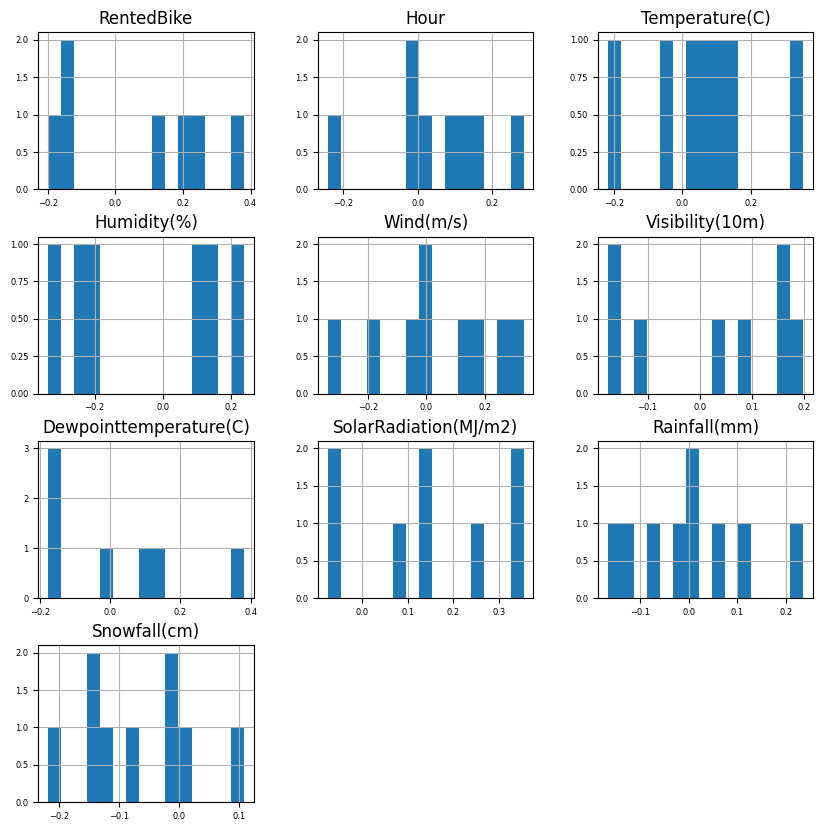

In [6]:
correlacion[(correlacion > -0.4) & (correlacion < 0.4)].hist(bins=15, figsize=(10,10), xlabelsize=6, ylabelsize=6)

**Conclusiones**

Como se puede observar en las tablas anteriores, lo que mas influye para la renta de bicicletas es la temperatura, y la temperatura de rocio asociada. sin embargo, tambien se detecta que lo que mas influye es la radiación solar, si esta disminuye es mas probable que renten durante el día.

Se puede apreciar, de igual manera que la hora no influye tanto a comparación si hay mayor indice de nevada o de viento, ya que se entiende si estos son mayores a las personas se les puede dificultar el estar en la intemperie por el temor a enfermarse.

---------------------------------------------------------------------------

# 29 - 08 - 2024

Calcular modelo de regresión lineal simple (1 variable independiente) para estimar el numero de bicicletas rentadas

¿cual es la variable independiente a utilizar?

¿Porque?

Ecuacion de regresión obtenida


Cuanto vale el error cuadrado medio

# Respuestas

¿cual es la variable independiente a utilizar?
¿Porque?

X= La variable independiente sera la columna de Temperatura
Y= la variable dependiente seran el num de bicicletas rentadas

Se escogieron las variables anteriores debido a que numero de ventas puede variar dependiendo de la temperatura. Conforme la temperatura se aproxima a 30°C sube el numero de biciletas rentadas, sin mebargo si aumenta mas, se entiende que a mayor calor disminuye el valor anterior

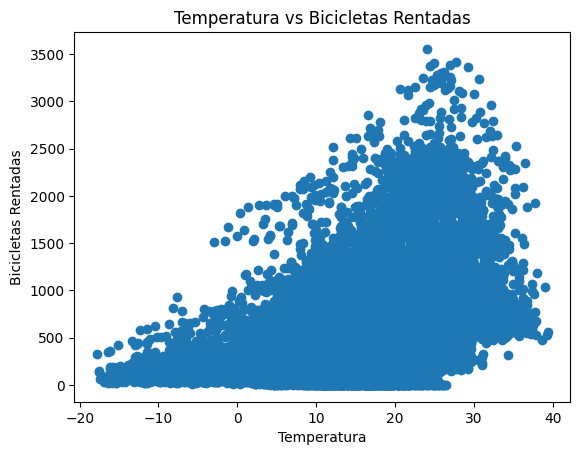

In [7]:
# Visualizar los datos
#X= La variable independiente sera la columna de las horas
#Y= la variable dependiente seran el num de bicicletas rentadas

plt.scatter(datos['Temperature(C)'], datos['RentedBike'])
plt.xlabel('Temperatura')
plt.ylabel('Bicicletas Rentadas')
plt.title('Temperatura vs Bicicletas Rentadas')
plt.show()

In [8]:
#Correlacion entre las dos variables

correlacion = np.corrcoef(datos['Temperature(C)'],datos['RentedBike'])[0,1]
correlacion

0.5385581530139789

In [9]:
corr_matrix = datos[['RentedBike','Temperature(C)','Hour']].corr(method='pearson')
corr_matrix

,RentedBike,Temperature(C),Hour
RentedBike,1.000000,0.538558,0.410257
Temperature(C),0.538558,1.000000,0.124114
Hour,0.410257,0.124114,1.000000


https://cienciadedatos.net/documentos/py10b-regresion-lineal-multiple-python

Dividir los datos en conjuntos de entrenamiento y prueba

In [10]:
# Preparar los datos
X = datos[['Temperature(C)']]
y = datos['RentedBike']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenando el modelo

In [11]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Calculo del Error Cuadrado Medio:

In [12]:
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 293180.0061746947


Calculo de la ecuación de

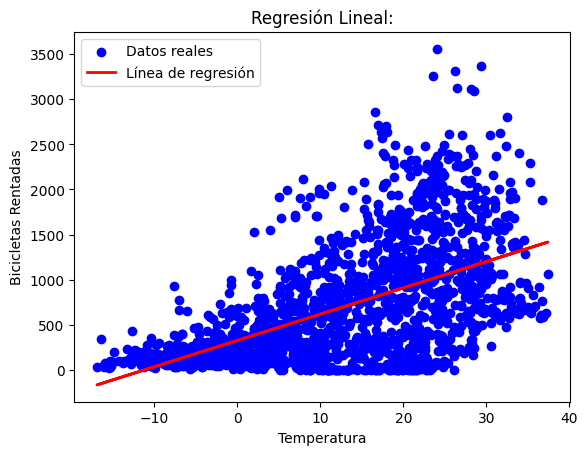

In [13]:
# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Temperatura')
plt.ylabel('Bicicletas Rentadas')
plt.title('Regresión Lineal:')
plt.legend()
plt.show()

In [14]:
# Imprimir la ecuación de la regresión
print(f'Intersección (β0): {model.intercept_}')
print(f'Pendiente (β1): {model.coef_[0]}')

Intersección (β0): 328.00842237963997
Pendiente (β1): 29.129307768537917
